# Práctica 2: Programación GPU y Computación Cuántica

## Parte de CUDA: Preguntas de suma de vectores

María Barroso Honrubia

Gloria del Valle Cano

## Parte 1: Tutorial suma de vectores
A continuación se discuten diferentes versiones de un programa que suma los elementos de un vector en CUDA, partiendo de la lógica empleada en el Tutorial proporcionado de CUDA.


# Entorno de Ejecución
Compilador y GPU

Comprobamos la version del compilador cuda y que GPU tenemos disponible

In [1]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Sun Nov  7 13:36:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |            

In [2]:
!!nvidia-smi -q -i 0 | grep "Product Name"

['    Product Name                          : Tesla K80']

Directorio de trabajo

In [3]:
!pwd
!ls -la .

/content
total 20
drwxr-xr-x 1 root root 4096 Nov  7 11:27 .
drwxr-xr-x 1 root root 4096 Nov  7 11:26 ..
drwxr-xr-x 4 root root 4096 Nov  1 13:34 .config
drwxr-xr-x 1 root root 4096 Nov  1 13:35 sample_data
drwxr-xr-x 2 root root 4096 Nov  7 13:17 workcuda


Creamos un subditectorio para el trabajo con cuda

In [4]:
!mkdir workcuda
!ls -la 

mkdir: cannot create directory ‘workcuda’: File exists
total 20
drwxr-xr-x 1 root root 4096 Nov  7 11:27 .
drwxr-xr-x 1 root root 4096 Nov  7 11:26 ..
drwxr-xr-x 4 root root 4096 Nov  1 13:34 .config
drwxr-xr-x 1 root root 4096 Nov  1 13:35 sample_data
drwxr-xr-x 2 root root 4096 Nov  7 13:17 workcuda


# Suma en la CPU
Directorio de trabajo /content/workcuda


Cambiar al directorio de trabjo

In [5]:
%cd /content/workcuda/
!ls -la
!pwd

/content/workcuda
total 4928
drwxr-xr-x 2 root root   4096 Nov  7 13:17 .
drwxr-xr-x 1 root root   4096 Nov  7 11:27 ..
-rwxr-xr-x 1 root root 711464 Nov  7 11:27 suma0
-rw-r--r-- 1 root root   1090 Nov  7 11:27 suma0.cu
-rwxr-xr-x 1 root root 716024 Nov  7 11:28 suma1
-rw-r--r-- 1 root root   1369 Nov  7 11:27 suma1.cu
-rwxr-xr-x 1 root root 716024 Nov  7 11:28 suma1sinarch
-rwxr-xr-x 1 root root 716024 Nov  7 11:28 suma2
-rw-r--r-- 1 root root   1380 Nov  7 11:28 suma2.cu
-rwxr-xr-x 1 root root 716024 Nov  7 11:32 suma3
-rw-r--r-- 1 root root   1375 Nov  7 11:32 suma3.cu
-rwxr-xr-x 1 root root 716024 Nov  7 13:17 suma5
-rw-r--r-- 1 root root   1684 Nov  7 13:17 suma5.cu
-rwxr-xr-x 1 root root 716352 Nov  7 11:57 suma_ex
-rw-r--r-- 1 root root   1297 Nov  7 11:57 suma_ex.cu
/content/workcuda


Escribir en el directorio actual el fichero suma0.cu


In [6]:
%%writefile suma0.cu

#include <iostream>
#include <math.h>

#include <time.h>
#include <sys/time.h>

void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;

    float *x = new float[N];
    float *y = new float[N]; 
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }
    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "suma de " << N << " Elementos" << std::endl;
   std::cout << "Número de Errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;

   
   delete [] x;
   delete [] y;
   return 0;
}

Overwriting suma0.cu


Comprobamos el fichero que se ha escrito

In [7]:
!ls -la

total 4928
drwxr-xr-x 2 root root   4096 Nov  7 13:17 .
drwxr-xr-x 1 root root   4096 Nov  7 11:27 ..
-rwxr-xr-x 1 root root 711464 Nov  7 11:27 suma0
-rw-r--r-- 1 root root   1090 Nov  7 13:36 suma0.cu
-rwxr-xr-x 1 root root 716024 Nov  7 11:28 suma1
-rw-r--r-- 1 root root   1369 Nov  7 11:27 suma1.cu
-rwxr-xr-x 1 root root 716024 Nov  7 11:28 suma1sinarch
-rwxr-xr-x 1 root root 716024 Nov  7 11:28 suma2
-rw-r--r-- 1 root root   1380 Nov  7 11:28 suma2.cu
-rwxr-xr-x 1 root root 716024 Nov  7 11:32 suma3
-rw-r--r-- 1 root root   1375 Nov  7 11:32 suma3.cu
-rwxr-xr-x 1 root root 716024 Nov  7 13:17 suma5
-rw-r--r-- 1 root root   1684 Nov  7 13:17 suma5.cu
-rwxr-xr-x 1 root root 716352 Nov  7 11:57 suma_ex
-rw-r--r-- 1 root root   1297 Nov  7 11:57 suma_ex.cu


Compilamos el archivo suma0.cu

In [8]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma0.cu -o suma0 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [9]:
!ls

suma0	  suma1     suma1sinarch  suma2.cu  suma3.cu  suma5.cu	suma_ex.cu
suma0.cu  suma1.cu  suma2	  suma3     suma5     suma_ex


Corremos el fichero ejecutable

In [10]:
!./suma0

Tiempo del cálculo : 4.125000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0


En el código realizado para CPU se puede ver que se invierten unos 4 ms en sumar todos los elementos, sin errores.

# Suma en la GPU con un solo thread (serie)

Escribir en el directorio actual el fichero suma1.cu


In [11]:
%%writefile suma1.cu

#include <iostream>
#include <math.h>

#include <time.h>
#include <sys/time.h>

__global__ void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<1,1>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "suma de " << N << " Elementos" << std::endl;
   std::cout << "Número de Errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;

   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma1.cu


Compilamos el archivo suma1.cu

In [12]:
!ls -la

total 4928
drwxr-xr-x 2 root root   4096 Nov  7 13:36 .
drwxr-xr-x 1 root root   4096 Nov  7 11:27 ..
-rwxr-xr-x 1 root root 711464 Nov  7 13:36 suma0
-rw-r--r-- 1 root root   1090 Nov  7 13:36 suma0.cu
-rwxr-xr-x 1 root root 716024 Nov  7 11:28 suma1
-rw-r--r-- 1 root root   1369 Nov  7 13:36 suma1.cu
-rwxr-xr-x 1 root root 716024 Nov  7 11:28 suma1sinarch
-rwxr-xr-x 1 root root 716024 Nov  7 11:28 suma2
-rw-r--r-- 1 root root   1380 Nov  7 11:28 suma2.cu
-rwxr-xr-x 1 root root 716024 Nov  7 11:32 suma3
-rw-r--r-- 1 root root   1375 Nov  7 11:32 suma3.cu
-rwxr-xr-x 1 root root 716024 Nov  7 13:17 suma5
-rw-r--r-- 1 root root   1684 Nov  7 13:17 suma5.cu
-rwxr-xr-x 1 root root 716352 Nov  7 11:57 suma_ex
-rw-r--r-- 1 root root   1297 Nov  7 11:57 suma_ex.cu


In [13]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma1.cu -o suma1 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [14]:
!/usr/local/cuda/bin/nvcc -rdc=true suma1.cu -o suma1sinarch -lcudadevrt

In [15]:
!ls

suma0	  suma1     suma1sinarch  suma2.cu  suma3.cu  suma5.cu	suma_ex.cu
suma0.cu  suma1.cu  suma2	  suma3     suma5     suma_ex


Corremos el fichero ejecutable compilado sin flag -arch (Modelo de computación de la GPU)

In [16]:
!./suma1sinarch

Tiempo del cálculo : 0.016000 ms
Tiempo con el synchronize  : 0.049000 ms
suma de 1048576 Elementos
Número de Errores: 1048576
Max error: 1


No está funcionando correctamente. 

Ejecutamos el compilado con flag -arch (Modelo de computación de la GPU)

In [17]:
!./suma1

Tiempo del cálculo : 1.482000 ms
Tiempo con el synchronize  : 405.960000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0


# P1 ¿Qué característica del modelo de computación esta siendo necesaria? 

Para poder compilar correctamente CUDA es necesario especificar la arquitectura SM (NVIDIA GPU) y su versión.

Nota: la arquitectura Kepler de sm_37 ya no estará soportada por CUDA 11 (la versión que utilizamos). De todas maneras aún está disponible por lo que preferimos no cambiarla porque estamos utilizando Tesla K80.

Más información sobre este flag: [ver aquí](https://arnon.dk/matching-sm-architectures-arch-and-gencode-for-various-nvidia-cards).

Hacemos el profile de ejecución

In [18]:
!nvprof ./suma1

==2761== NVPROF is profiling process 2761, command: ./suma1
==2761== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo : 1.279000 ms
Tiempo con el synchronize  : 333.028000 ms
suma de 1048576 Elementos
Número de Errores: 0
Max error: 0
==2761== Profiling application: ./suma1
==2761== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  331.70ms         1  331.70ms  331.70ms  331.70ms  add(int, float*, float*)
      API calls:   60.89%  331.73ms         1  331.73ms  331.73ms  331.73ms  cudaDeviceSynchronize
                   38.57%  210.12ms         2  105.06ms  704.56us  209.41ms  cudaMallocManaged
                    0.23%  1.2669ms         1  1.2669ms  1.2669ms  1.2669ms  cudaLaunchKernel
                    0.16%  868.56us         2  434.28us  402.61us  465.95us  cudaFree
                    0.10%  568.88us         1  568.88us  568.88us  568.88us  cuDeviceTotal

# P2 ¿La suma ha tardado más  o menos que en la CPU? Justifique como está funcionando.

Vemos que el resultado es correcto, pero estamos haciendo un mal uso de la GPU al no estar haciendo ninguna división. Por consiguiente esto puede afectar al tiempo de ejecución, que se puede ver fácilmente con el $\texttt{profiler}$, ya que se ejecuta en GPU pero en serie. En concreto, la suma $\texttt{add}$ está tardando muchísimo más que en CPU, 400 ms más.

# Suma en la GPU con mas threads <<<1,256>>. Paralelismo sin aprovechar y posible Data Race

NOTA: Con este ejercicio se pretende comprobar un funcionamiento no deseado

Escribir en el directorio actual el fichero suma2.cu


In [19]:
%%writefile suma2.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__ void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<1,256>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma2 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);


   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 

   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma2.cu


In [20]:
%ls

suma0*    suma1*    suma1sinarch*  suma2.cu  suma3.cu  suma5.cu  suma_ex.cu
suma0.cu  suma1.cu  suma2*         suma3*    suma5*    suma_ex*


Compilamos el archivo suma2.cu

In [21]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma2.cu -o suma2 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [22]:
!ls

suma0	  suma1     suma1sinarch  suma2.cu  suma3.cu  suma5.cu	suma_ex.cu
suma0.cu  suma1.cu  suma2	  suma3     suma5     suma_ex


Corremos el fichero ejecutable

In [23]:
!./suma2

Tiempo del cálculo suma2 : 1.097000 ms
Tiempo con el synchronize  : 295.664000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [24]:
!nvprof ./suma2

==2810== NVPROF is profiling process 2810, command: ./suma2
==2810== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma2 : 1.186000 ms
Tiempo con el synchronize  : 287.317000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==2810== Profiling application: ./suma2
==2810== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  286.10ms         1  286.10ms  286.10ms  286.10ms  add(int, float*, float*)
      API calls:   55.13%  286.10ms         1  286.10ms  286.10ms  286.10ms  cudaDeviceSynchronize
                   44.35%  230.19ms         2  115.10ms  616.20us  229.57ms  cudaMallocManaged
                    0.23%  1.1714ms         1  1.1714ms  1.1714ms  1.1714ms  cudaLaunchKernel
                    0.16%  835.53us         2  417.76us  405.56us  429.97us  cudaFree
                    0.09%  488.44us         1  488.44us  488.44us  488.44us  cuDevic

#P3 ¿La suma ha funcionado? ¿ Ha tardado más o menos que en el caso anterior? Justifique como está funcionando.

Pensando que al paralelizar el código se debería obtener un resultado bastante mejor, tarda prácticamente 300 ms. Esto es porque por cada thread se realizan 256 sumas, por lo que no aprovecha considerablemente el paralelismo.

# Explique si podrían generarse situaciones de funcionamiento incorrecto.

En este caso el acceso a memoria global se realiza por cada thread, por lo que al modificar el valor correspondiente del vector se pueden producir errores si un thread llega antes que otro (data race). Por lo que si ejecutamos este problema varias veces es posible que obtengamos errores. Tal vez se pueda observar mejor con un número mayor de threads.

# Suma en la GPU con mas threads <<<256,1>> sin paralelismo y Data Race

NOTA: Con este ejercicio se pretende comprobar un funcionamiento no deseado

Escribir en el directorio actual el fichero suma3.cu


In [25]:
%%writefile suma3.cu

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>


__global__ void add(int n, float *x, float *y) {
    
    for (int i =0; i < n; i++ ){
        y[i]=x[i]+y[i];
    }
}


int main(void) {
    
    int N = 1 <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
    add<<<256,1>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma3 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "suma de " << N << " Elementos" << std::endl;
   std::cout << "Número de Errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;

   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma3.cu


In [26]:
!ls

suma0	  suma1     suma1sinarch  suma2.cu  suma3.cu  suma5.cu	suma_ex.cu
suma0.cu  suma1.cu  suma2	  suma3     suma5     suma_ex


Compilamos el archivo suma3.cu

In [27]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma3.cu -o suma3 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [28]:
!ls

suma0	  suma1     suma1sinarch  suma2.cu  suma3.cu  suma5.cu	suma_ex.cu
suma0.cu  suma1.cu  suma2	  suma3     suma5     suma_ex


Corremos el fichero ejecutable

In [29]:
!./suma3

Tiempo del cálculo suma3 : 1.063000 ms
Tiempo con el synchronize  : 653.004000 ms
suma de 1048576 Elementos
Número de Errores: 1048576
Max error: 214


Ejecutamos varias veces

In [30]:
!./suma3

Tiempo del cálculo suma3 : 0.995000 ms
Tiempo con el synchronize  : 638.655000 ms
suma de 1048576 Elementos
Número de Errores: 1048576
Max error: 216


In [31]:
!./suma3

Tiempo del cálculo suma3 : 1.105000 ms
Tiempo con el synchronize  : 634.338000 ms
suma de 1048576 Elementos
Número de Errores: 1048576
Max error: 216


Hacemos el profile de ejecución

In [32]:
!nvprof ./suma3

==2865== NVPROF is profiling process 2865, command: ./suma3
==2865== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma3 : 1.184000 ms
Tiempo con el synchronize  : 635.070000 ms
suma de 1048576 Elementos
Número de Errores: 1048576
Max error: 223
==2865== Profiling application: ./suma3
==2865== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  633.84ms         1  633.84ms  633.84ms  633.84ms  add(int, float*, float*)
      API calls:   73.44%  633.86ms         1  633.86ms  633.86ms  633.86ms  cudaDeviceSynchronize
                   26.24%  226.44ms         2  113.22ms  566.61us  225.88ms  cudaMallocManaged
                    0.14%  1.1712ms         1  1.1712ms  1.1712ms  1.1712ms  cudaLaunchKernel
                    0.11%  933.92us         2  466.96us  459.38us  474.54us  cudaFree
                    0.05%  459.36us         1  459.36us  459.36us  459.36us 

#P5 La suma ha tardado más tiempo y con errores ¿Qué está pasando?
Al haber solo un thread por bloque solo se ejecuta un warp por bloque. Esto no está realizando un aprovechamiento de CUDA y por tanto no maximiza el aprovechamiento de la GPU, por lo que no solo tarda mucho más sino que además se generan muchos más errores, lo cual explicamos en la siguiente pregunta.


# P6 Compare con el tiempo de ejecución de un solo Thread y con la ejecución en CPU.¿Que puede deducir de estos comportamientos?
Este caso es diferente al anterior porque solo se ejecuta un thread dentro de cada bloque y al no haber ningún recurso o lógica que los sincronice y estar separados la condición de carrera es inevitable. El número de errores es una cuestión que es bastante aleatoria en cada ejecución.

#¿Se puede seguir optimizando?
Sí, si realizamos un uso adecuado de threads y bloques como en los siguientes ejemplos.

# P7 Realice el paralelismo correspondiente a la Suma en la GPU con paralelismo <<<256,1>> y estudie el comportamiento de los tiempos de ejecución.

Para este caso modificamos el código de la función de suma y separamos las diferentes posibilidades para que no existan conflictos de escritura.

In [33]:
%%writefile suma_ex.cu

#define N (1<<20)
#define THREADS 256
#define BLOCKS 1

#include <iostream>
#include <math.h>

__global__ void add(int n, float *x, float *y) {
  int i = blockIdx.x * blockDim.x + threadIdx.x;
  if (i < n)
    y[i] = x[i] + y[i];
}

__global__ void add_thx(int n, float *x, float *y) {
  for (int i = threadIdx.x; i < n; i += blockDim.x)
    y[i] = x[i] + y[i];
}

__global__ void add_bl(int n, float *x, float *y) {
  for (int i = blockIdx.x; i < n; i += gridDim.x)
    y[i] = x[i] + y[i];
}

int main(void) {
  float *x; 
  float *y;

  cudaMallocManaged(&x, N*sizeof(float));
  cudaMallocManaged(&y, N*sizeof(float));
  
  for (int i =0; i < N; i++ ){
    x[i]= 1.0f;
    y[i]= 2.0f;
  }

#if BLOCKS > 0 && THREADS == 1
  add_bl<<<BLOCKS,THREADS>>>(N, x, y);
#elif BLOCKS == 1 && THREADS > 0
  add_thx<<<BLOCKS,THREADS>>>(N, x, y);
#else
  add<<<BLOCKS,THREADS>>>(N, x, y);
#endif

  cudaDeviceSynchronize();

  float maxError = 0.0f;
  int contError = 0;
  for (int i=0; i <N; i++){
    maxError=fmax(maxError,fabs(y[i]-3.0f));
    if (y[i] != 3.0) contError++;
  }

  std::cout << "Suma de " << N << " elementos" << std::endl;
  std::cout << "Número de Errores: " <<contError << std::endl;
  std::cout << "Max error: " <<maxError << std::endl;

  cudaFree (x);
  cudaFree (y);
  return 0;
}

Overwriting suma_ex.cu


In [34]:
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma_ex.cu -o suma_ex -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [35]:
!nvprof ./suma_ex

==2909== NVPROF is profiling process 2909, command: ./suma_ex
==2909== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Suma de 1048576 elementos
Número de Errores: 0
Max error: 0
==2909== Profiling application: ./suma_ex
==2909== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  1.9760ms         1  1.9760ms  1.9760ms  1.9760ms  add_thx(int, float*, float*)
      API calls:   97.83%  209.94ms         2  104.97ms  552.18us  209.39ms  cudaMallocManaged
                    0.93%  1.9882ms         1  1.9882ms  1.9882ms  1.9882ms  cudaDeviceSynchronize
                    0.50%  1.0741ms         1  1.0741ms  1.0741ms  1.0741ms  cudaLaunchKernel
                    0.37%  801.42us         2  400.71us  389.05us  412.37us  cudaFree
                    0.28%  594.49us         1  594.49us  594.49us  594.49us  cuDeviceTotalMem
                    0.08%  171.65us       101  1.6990us     156n

De esta manera vemos que utilizando 256 threads/ 1 bloque se aprovecha bastante mejor el uso de la GPU y no se producen errores.

Probamos ahora a ejecutar el caso de 256 bloques / 1 thread:

In [36]:
!sed -i '/#define THREADS/c\#define THREADS 1' suma_ex.cu
!sed -i '/#define BLOCKS/c\#define BLOCKS 256' suma_ex.cu
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma_ex.cu -o suma_ex -lcudadevrt
!nvprof ./suma_ex

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==2955== NVPROF is profiling process 2955, command: ./suma_ex
==2955== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Suma de 1048576 elementos
Número de Errores: 0
Max error: 0
==2955== Profiling application: ./suma_ex
==2955== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  5.2988ms         1  5.2988ms  5.2988ms  5.2988ms  add_bl(int, float*, float*)
      API calls:   96.18%  216.52ms         2  108.26ms  763.36us  215.76ms  cudaMallocManaged
                    2.36%  5.3133ms         1  5.3133ms  5.3133ms  5.3133ms  cudaDeviceSynchronize
                    0.66%  1.4946ms         1  1.4946ms  1.4946ms  1.4946ms  cudaLaunchKernel
                    0.46%  1.03

De la misma manera se soluciona el problema del data race y se reduce considerablemente el tiempo de cómputo.

# Suma en la GPU con paralelismo de bloques

---



https://developer.nvidia.com/blog/even-easier-introduction-cuda/

Escribir en el directorio actual el fichero suma5.cu


In [37]:
%%writefile suma5.cu

#define THREADS 256

#define TAM 1

#include <iostream>
#include <math.h>
#include <time.h>
#include <sys/time.h>

__global__
void add(int n, float *x, float *y)
{
  int index = blockIdx.x * blockDim.x + threadIdx.x;
  int stride = blockDim.x * gridDim.x;
  for (int i = index; i < n; i += stride)
    y[i] = x[i] + y[i];
}

int main(void) {
    
    int N = TAM <<20;  // N = 2^20 = 1024*1024= 1.048.576
    struct timeval tv;
	  unsigned long long start;
    float *x; // = new float[N];
    float *y; // = new float[N]; 

  // Allocate Unified Memory -- accessible from CPU or GPU
    cudaMallocManaged(&x, N*sizeof(float));
    cudaMallocManaged(&y, N*sizeof(float));
    
    for (int i =0; i < N; i++ ){
        x[i]= 1.0f;
        y[i]= 2.0f;
    }

    int blockSize = THREADS;
    int numBlocks = (N + blockSize - 1) / blockSize;
    
    gettimeofday(&tv, NULL); 
    start=tv.tv_sec*1000000+tv.tv_usec;
   
   add<<<numBlocks, blockSize>>>(N, x, y);
  
    gettimeofday(&tv, NULL); 
	  printf("Tiempo del cálculo suma 5 : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);
  
   cudaDeviceSynchronize();
    gettimeofday(&tv, NULL); 
	  printf("Tiempo con el synchronize  : %lf ms\n", (tv.tv_sec*1000000+tv.tv_usec - start)/1000.0);

   float maxError = 0.0f;
   int contError = 0;
   
   for (int i=0; i <N; i++){
       maxError=fmax(maxError,fabs(y[i]-3.0f));
       if (y[i] != 3.0) contError++; 
   }
   std::cout << "Suma de " << N << " elementos" << std::endl;
   std::cout << "Número de errores: " <<contError << std::endl;
   std::cout << "Max error: " <<maxError << std::endl;
  
 
  // Free memory
   cudaFree (x);
   cudaFree (y);
   
   return 0;
}

Overwriting suma5.cu


Para entender los bloques y threads por bloque
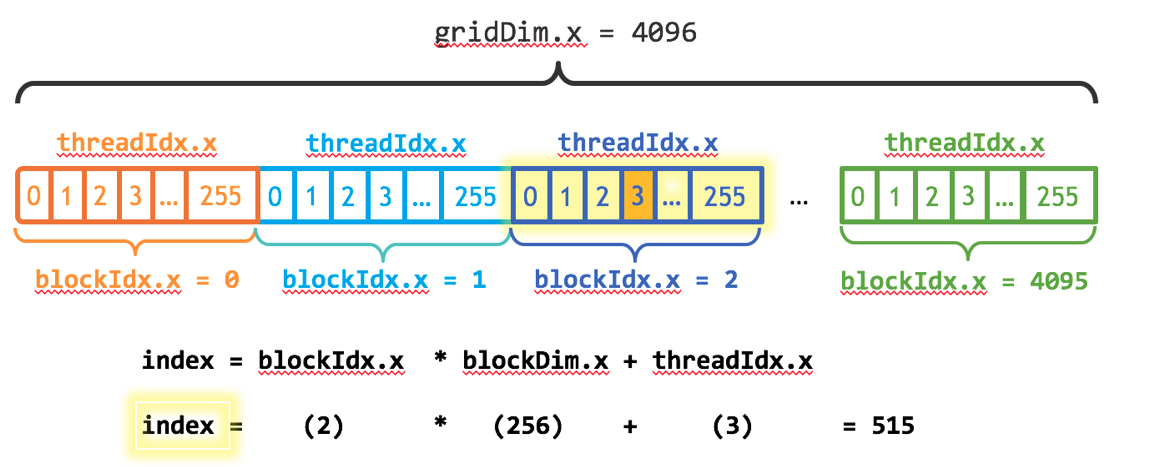

update the kernel code to take into account the entire grid of thread blocks. CUDA provides gridDim.x, which contains the number of blocks in the grid, and blockIdx.x, which contains the index of the current thread block in the grid. Figure 1 illustrates the the approach to indexing into an array (one-dimensional) in CUDA using blockDim.x, gridDim.x, and threadIdx.x. The idea is that each thread gets its index by computing the offset to the beginning of its block (the block index times the block size: blockIdx.x * blockDim.x) and adding the thread’s index within the block (threadIdx.x). The code blockIdx.x * blockDim.x + threadIdx.x is idiomatic CUDA.

Compilamos el archivo suma5.cu

In [38]:
!/usr/local/cuda/bin/nvcc -arch=sm_37 -rdc=true suma5.cu -o suma5 -lcudadevrt

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [39]:
!ls

suma0	  suma1     suma1sinarch  suma2.cu  suma3.cu  suma5.cu	suma_ex.cu
suma0.cu  suma1.cu  suma2	  suma3     suma5     suma_ex


Corremos el fichero ejecutable

In [40]:
!./suma5

Tiempo del cálculo suma 5 : 1.454000 ms
Tiempo con el synchronize  : 1.574000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0


Hacemos el profile de ejecución

In [41]:
!nvprof ./suma5

==3003== NVPROF is profiling process 3003, command: ./suma5
==3003== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 5 : 1.601000 ms
Tiempo con el synchronize  : 1.717000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==3003== Profiling application: ./suma5
==3003== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  102.88us         1  102.88us  102.88us  102.88us  add(int, float*, float*)
      API calls:   98.31%  202.53ms         2  101.27ms  778.39us  201.75ms  cudaMallocManaged
                    0.77%  1.5939ms         1  1.5939ms  1.5939ms  1.5939ms  cudaLaunchKernel
                    0.53%  1.0825ms         2  541.24us  481.81us  600.66us  cudaFree
                    0.23%  473.82us         1  473.82us  473.82us  473.82us  cuDeviceTotalMem
                    0.10%  202.64us       101  2.0060us     163ns  96.677us  cuDeviceGetAt

#P8 Compare con el tiempo de ejecución con el resto de ejemplos anteriores.¿Que puede deducir de estos comportamientos?

En este caso se aprovecha considerablemente los recursos de CUDA utilizando un número de bloques ajustado al número de threads preestablecido. Además, en la función $add$ se utiliza una estrategia genérica para sumar vectores sin depender ni del propio tamaño del vector ni del tamaño del grid, por lo que se ajusta en cada operación de suma.

# P9 Pruebe el último ejercicio con más threads por bloque

In [42]:
!sed -i '/#define THREADS/c\#define THREADS 512' suma5.cu
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma5.cu -o suma5 -lcudadevrt
!nvprof ./suma5

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==3048== NVPROF is profiling process 3048, command: ./suma5
==3048== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 5 : 1.618000 ms
Tiempo con el synchronize  : 1.737000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==3048== Profiling application: ./suma5
==3048== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  105.38us         1  105.38us  105.38us  105.38us  add(int, float*, float*)
      API calls:   98.53%  236.79ms         2  118.40ms  785.77us  236.01ms  cudaMallocManaged
                    0.67%  1.6038ms         1  1.6038ms  1.6038ms  1.6038ms  cudaLaunchKernel
                    0.45%  1.0726ms         2  536.31us 

In [43]:
!sed -i '/#define THREADS/c\#define THREADS 1024' suma5.cu
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma5.cu -o suma5 -lcudadevrt
!nvprof ./suma5

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==3093== NVPROF is profiling process 3093, command: ./suma5
==3093== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 5 : 1.543000 ms
Tiempo con el synchronize  : 1.669000 ms
Suma de 1048576 elementos
Número de errores: 0
Max error: 0
==3093== Profiling application: ./suma5
==3093== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  107.74us         1  107.74us  107.74us  107.74us  add(int, float*, float*)
      API calls:   98.39%  213.36ms         2  106.68ms  790.55us  212.57ms  cudaMallocManaged
                    0.71%  1.5353ms         1  1.5353ms  1.5353ms  1.5353ms  cudaLaunchKernel
                    0.51%  1.1076ms         2  553.82us 

Vemos que aprovecha bastante bien los recursos de la GPU pero que para este ejemplo no parece tan eficiente utilizar tantos hilos.

# P10 Pruebe el último ejercicio variando N para tamaños que no sean múltiplos del número de threads por bloque que se esté usando.

In [44]:
!sed -i '/#define THREADS/c\#define THREADS 517' suma5.cu
!sed -i '/#define TAM/c\#define TAM 77' suma5.cu
!/usr/local/cuda/bin/nvcc -arch=sm_35 -rdc=true suma5.cu -o suma5 -lcudadevrt
!nvprof ./suma5

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
==3139== NVPROF is profiling process 3139, command: ./suma5
==3139== Warning: Auto boost enabled on device 0. Profiling results may be inconsistent.
Tiempo del cálculo suma 5 : 93.402000 ms
Tiempo con el synchronize  : 102.174000 ms
Suma de 80740352 elementos
Número de errores: 0
Max error: 0
==3139== Profiling application: ./suma5
==3139== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  8.7503ms         1  8.7503ms  8.7503ms  8.7503ms  add(int, float*, float*)
      API calls:   61.29%  317.31ms         2  158.66ms  49.134ms  268.18ms  cudaMallocManaged
                   18.84%  97.557ms         2  48.779ms  45.765ms  51.792ms  cudaFree
                   18.04%  93.379ms         1  93.379ms  93.

Se sigue sin tener errores pero con un tiempo de ejecución bastante mayor.